# Polynomial Regression

## Definition

Polynomial regression is a form of regression analysis in which the relationship between the independent variable(s) and the dependent variable is modeled as an n-th degree polynomial. Linear regression is to the 1st degree. Polynomial regression allows for a more flexible fit to the data compared to linear regression.

## When to Use

Polynomial regression is mainly used when there is a non-linear relationship between the independent and dependent variables. For analysis' that can't be properly modeled by a simple linear regression. If you make a plot of the data and see that there's a trend in the data that isn't linear, it would be a good idea to try polynomial regression.

## Building a Model

Here we will be creating polynomial regression models so it's easy to understand.

### Manual Implementation

Here we will implement polynomial regression using pure math. The process involves transforming the input features into polynomial features and then applying linear regression.

In [40]:
import numpy as np

X = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])
y = np.array([1, 4, 9, 16, 25, 36, 49, 64, 81, 100])

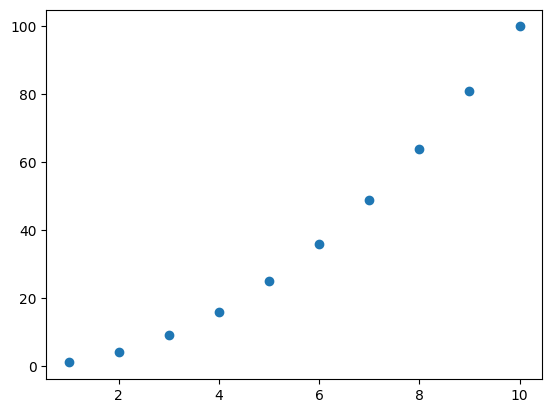

In [41]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.scatter(X, y)
plt.show()

We can see that this plot has a clear trend, but it isn't linear, so let's try polynomial regression.

In [112]:
def polynomial_features(X, degree):
    n_samples, n_features = X.shape
    X_poly = np.ones(n_samples)

    for d in range(1, degree + 1):
        for i in range(n_features):
            X_poly = np.column_stack((X_poly, X[:, i] ** d))

    return X_poly

def polynomial_regression(X, y, degree):
    X_poly = polynomial_features(X, degree)

    XTX = X_poly.T.dot(X_poly)
    XTX_inv = np.linalg.inv(XTX)  # use np.linalg.pinv if XTX is singular
    b = XTX_inv.dot(X_poly.T).dot(y)

    return b

def predict_polynomial_regression(x_new, coefficients, degree):
    x_new = np.array(x_new).reshape(1, -1)  # ensure x_new is a 2D array
    x_new_poly = polynomial_features(x_new, degree)
    y_pred = np.dot(x_new_poly, coefficients)
    
    return y_pred[0]

degree = 2  # degree of the polynomial, it'll go up to x^2
coefficients = polynomial_regression(X, y, degree)
print(f"Coefficients: {coefficients}")

x_new = [8.30662386291804]
y_pred = predict_polynomial_regression(x_new, coefficients, degree)
print(f"Predicted value for x = {x_new}: {y_pred}")

Coefficients: [4.26325641e-13 2.84217094e-14 1.00000000e+00]
Predicted value for x = [8.30662386291804]: 69.00000000000001


There are 3 coefficients, and the degree is 2. The coefficients are for x^0, X^1 and x^2, respectively.

## Scikit-Learn Implementation

In [128]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

polynomial_features = PolynomialFeatures(degree=degrees)
X_polynomial_regression = polynomial_features.fit_transform(X)

polynomial_regression = LinearRegression()
polynomial_regression.fit(X_polynomial_regression, y)

x_new = np.array([25])
x_new_polynomial_regression = polynomial_features.transform(x_new.reshape(-1, 1))

y_new_polynomial_regression = polynomial_regression.predict(x_new_polynomial_regression)
y_new_polynomial_regression

array([625.])